# Lista 7


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [33]:
random_state = 222

## zad 1

TensorFlow to rozwiązanie open-source do uczenia maszynowego opracowana przez Google. Pozwala na budowanie i trenowanie modeli sieci neuronowych oraz innych algorytmów ML.

In [34]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.12.0


Proste operacja na tensorach

<center>
    <img src="./screens/l7-tensor-p1.png" style="width: 45%;"><br>
    <img src="./screens/l7-tensor-p2.png" style="width: 45%;">
</center>
<br>
<a href="https://www.tensorflow.org/guide/tensor?hl=pl">źródło</a>

In [35]:
tensor_a = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
tensor_b = tf.constant([[7, 8, 9], [10, 11, 12]], dtype=tf.float32)

print("Tensor A:")
print(tensor_a)
print("\nTensor B:")
print(tensor_b)

Tensor A:
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)

Tensor B:
tf.Tensor(
[[ 7.  8.  9.]
 [10. 11. 12.]], shape=(2, 3), dtype=float32)


Dodawanie

In [36]:
tensor_sum = tensor_a + tensor_b
print("Addition (A + B):")
print(tensor_sum)

Addition (A + B):
tf.Tensor(
[[ 8. 10. 12.]
 [14. 16. 18.]], shape=(2, 3), dtype=float32)


In [37]:
tensor_mul = tensor_a * tensor_b
print("Element-wise multiplication (A * B):")
print(tensor_mul)

Element-wise multiplication (A * B):
tf.Tensor(
[[ 7. 16. 27.]
 [40. 55. 72.]], shape=(2, 3), dtype=float32)


In [38]:
tensor_matmul = tf.matmul(tensor_a, tf.transpose(tensor_b))
print("Matrix multiplication (A @ B^T):")
print(tensor_matmul)

Matrix multiplication (A @ B^T):
tf.Tensor(
[[ 50.  68.]
 [122. 167.]], shape=(2, 2), dtype=float32)


In [39]:
tensor_a_transposed = tf.transpose(tensor_a)
print("Transposed A:")
print(tensor_a_transposed)
print(f"\nOriginal shape: {tensor_a.shape}")
print(f"Transposed shape: {tensor_a_transposed.shape}")

Transposed A:
tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)

Original shape: (2, 3)
Transposed shape: (3, 2)


## zad 2

Sztuczna sieć neuronowa (ANN) to model inspirowany biologicznymi sieciami neuronowymi. Składa się z warstw neuronów połączonych wagami.

<center>
    <img src="./screens/l7-ann.png" style="width: 60%;"><br>
</center>

W tym zadaniu zbuduję prostą sieć neuronową z:
- jedną warstwą wejściową
- jedną warstwą ukrytą
- jedną warstwą wyjściową

<center>
    <img src="./screens/l7-siec.png" style="width: 60%;"><br>
</center>

Model nauczy się prostej zależności regresyjnej: **y = 2x + 1**. Generuje najpierw dane syntetyczne

In [40]:
np.random.seed(random_state)
X = np.random.uniform(-10, 10, (100, 1)).astype(np.float32)
y = 2 * X + 1 + np.random.normal(0, 4, (100, 1)).astype(np.float32)  # small noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(f"training set size: {X_train.shape[0]}")
print(f"test set size: {X_test.shape[0]}")

training set size: 80
test set size: 20


wizualizacja

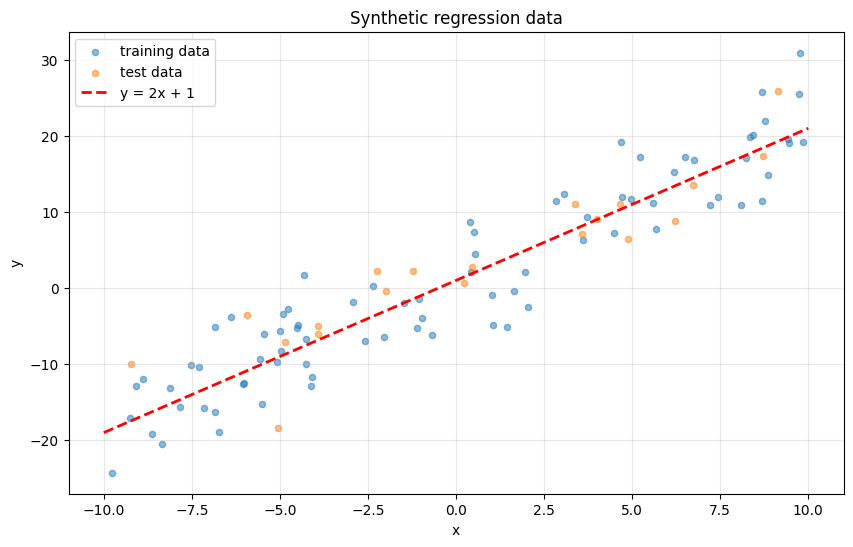

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='training data', s=20)
plt.scatter(X_test, y_test, alpha=0.5, label='test data', s=20)
x_line = np.linspace(-10, 10, 100)
y_line = 2 * x_line + 1
plt.plot(x_line, y_line, 'r--', linewidth=2, label='y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic regression data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

I budujemy strukture sieci używając architektury sequential

<center>
    <img src="./screens/l7-3-ways-of-model.png" style="width: 60%;"><br>
</center>
<br>
<a href="https://pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/">źródło</a>

Czym jest Keras? (zródło: <a href="https://boringowl.io/tag/keras">https://boringowl.io/tag/keras</a>)

Jak wspomniałem na wstępie Keras jest biblioteką do uczenia maszynowego dla języka Python. Pierwsze wydanie nastąpiło w 2015 roku, a twórcą biblioteki jest francuski programista François Chollet. Keras stosuje najlepsze praktyki w zakresie zmniejszania obciążenia poznawczego: oferuje spójne i proste interfejsy API, minimalizuje liczbę działań użytkownika wymaganych w typowych przypadkach użycia oraz zapewnia jasne i przydatne komunikaty o błędach. Zawiera również obszerną dokumentację i przewodniki dla programistów. Warto wspomnieć, że Keras umożliwia przełączanie się między różnymi interfejsami. Frameworki obsługiwane przez Keras to: Tensorflow, Theano, PlaidML, MXNet i CNTK.

<b>Keras jest wysokopoziomowa biblioteka do tworzenia sieci neuronowych w języku Python.</b>

In [42]:
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,), name='hidden_layer'),
    layers.Dense(1, name='output_layer')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'r2_score']
)

Podsumowanie modelu

In [43]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Trenowanie

In [44]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

Ewaluacja

In [45]:
test_loss, test_mae, test_r2 = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R2: {test_r2:.4f}")

y_pred = model.predict(X_test, verbose=0)

Test Loss (MSE): 19.0677
Test MAE: 3.3823
Test R2: 0.8095


wykresiki

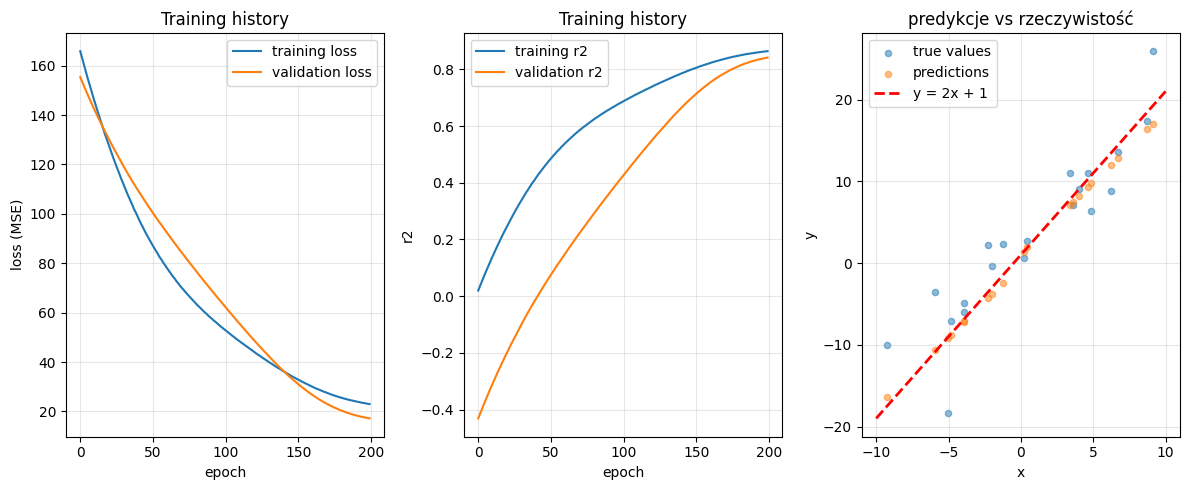

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.title('Training history')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(history.history['r2_score'], label='training r2')
plt.plot(history.history['val_r2_score'], label='validation r2')
plt.xlabel('epoch')
plt.ylabel('r2')
plt.title('Training history')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, alpha=0.5, label='true values', s=20)
plt.scatter(X_test, y_pred, alpha=0.5, label='predictions', s=20)
x_line = np.linspace(-10, 10, 100)
y_line = 2 * x_line + 1
plt.plot(x_line, y_line, 'r--', linewidth=2, label='y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('predykcje vs rzeczywistość')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## zad 3

Funkcje aktywacji wprowadzają nieliniowość do sieci neuronowej, co pozwala modelowi uczyć się złożonych wzorców.

<center>
    <img src="./screens/l7-funkcja-aktywacji.png" style="width: 60%;"><br>
</center>

W tym zadaniu porównam różne funkcje aktywacji dla warstwy ukrytej:
1. Relu
<center>
    <img src="./screens/l7-relu.png" style="width: 60%;"><br>
</center>

2. Sigmoidalna
<center>
    <img src="./screens/l7-sigmoid.png" style="width: 60%;"><br>
</center>

3. Tahn
<center>
    <img src="./screens/l7-tahn.png" style="width: 60%;"><br>
</center>

Ze znalezionych nowinek od siebie dołożę ELu (<a href="https://www.digitalocean.com/community/tutorials/relu-vs-elu-activation-function">źródło</a>)
4. Tahn
<center>
    <img src="./screens/l7-elu.png" style="width: 60%;"><br>
</center>

In [47]:
activations = ['relu', 'sigmoid', 'tanh', 'elu']
models = {}
histories = {}

for activation in activations:
    model = keras.Sequential([
        layers.Dense(10, activation=activation, input_shape=(1,), name=f'hidden_{activation}'),
        layers.Dense(1, name='output')
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae', 'r2_score']
    )
    
    print(f"Training model with {activation} activation...")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    models[activation] = model
    histories[activation] = history

Training model with relu activation...
Training model with sigmoid activation...
Training model with tanh activation...
Training model with elu activation...


I zobaczmy podsumowanie na wykresie

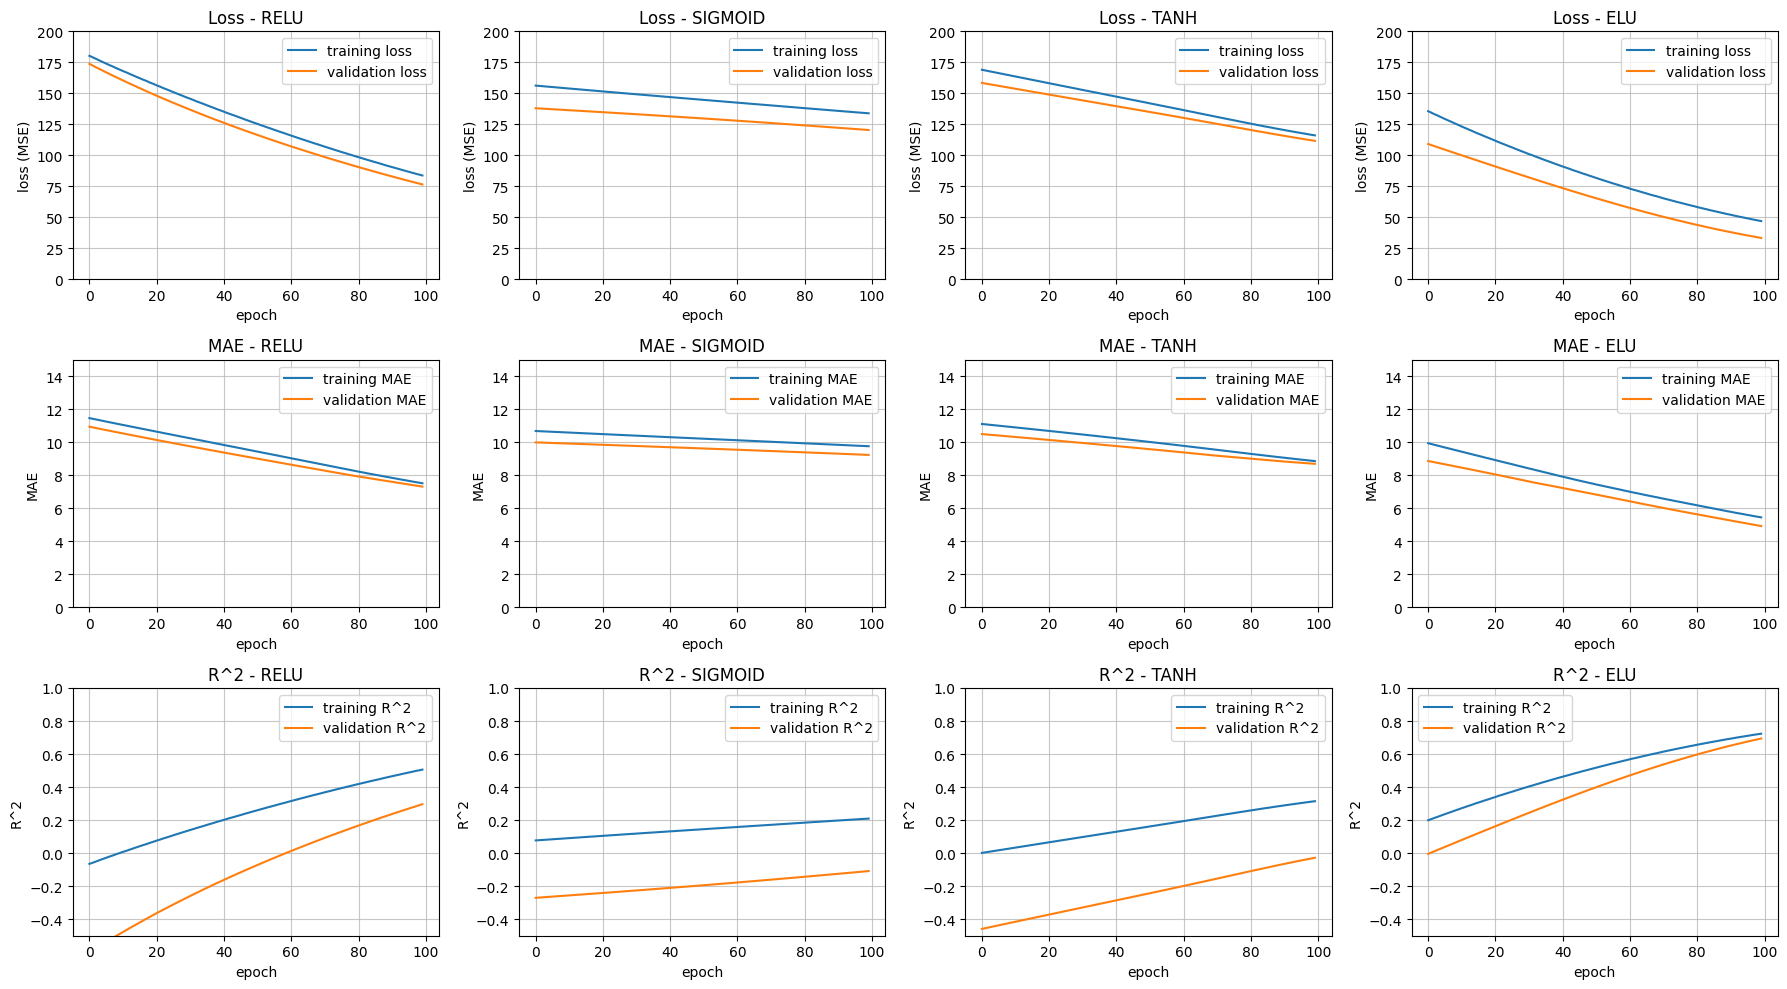

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

for i, activation in enumerate(activations):
    history = histories[activation]
    
    # Loss plot
    axes[0, i].plot(history.history['loss'], label='training loss')
    axes[0, i].plot(history.history['val_loss'], label='validation loss')
    axes[0, i].set_xlabel('epoch')
    axes[0, i].set_ylabel('loss (MSE)')
    axes[0, i].set_title(f'Loss - {activation.upper()}')
    axes[0, i].legend()
    axes[0, i].set_ylim(0, 200)
    axes[0, i].grid(True, alpha=0.7)
    
    # MAE plot
    axes[1, i].plot(history.history['mae'], label='training MAE')
    axes[1, i].plot(history.history['val_mae'], label='validation MAE')
    axes[1, i].set_xlabel('epoch')
    axes[1, i].set_ylabel('MAE')
    axes[1, i].set_title(f'MAE - {activation.upper()}')
    axes[1, i].legend()
    axes[1, i].set_ylim(0, 15)
    axes[1, i].grid(True, alpha=0.7)

    # R2 plot
    axes[2, i].plot(history.history['r2_score'], label='training R^2')
    axes[2, i].plot(history.history['val_r2_score'], label='validation R^2')
    axes[2, i].set_xlabel('epoch')
    axes[2, i].set_ylabel('R^2')
    axes[2, i].set_title(f'R^2 - {activation.upper()}')
    axes[2, i].legend()
    axes[2, i].set_ylim(-0.5, 1)
    axes[2, i].grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

In [49]:
results = []
for activation in activations:
    test_loss, test_mae, test_r2 = models[activation].evaluate(X_test, y_test, verbose=0)
    results.append({
        'activation': activation.upper(),
        'test_loss': test_loss,
        'test_mae': test_mae,
        'test_r2': test_r2,
    })

results_df = pd.DataFrame(results)
print("Comparison of activation functions:")
results_df

Comparison of activation functions:


,activation,test_loss,test_mae,test_r2
0,RELU,54.201557,5.584952,0.458578
1,SIGMOID,82.794785,7.025128,0.172960
2,TANH,74.071289,6.602033,0.260099
3,ELU,27.300634,3.701956,0.727293


/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


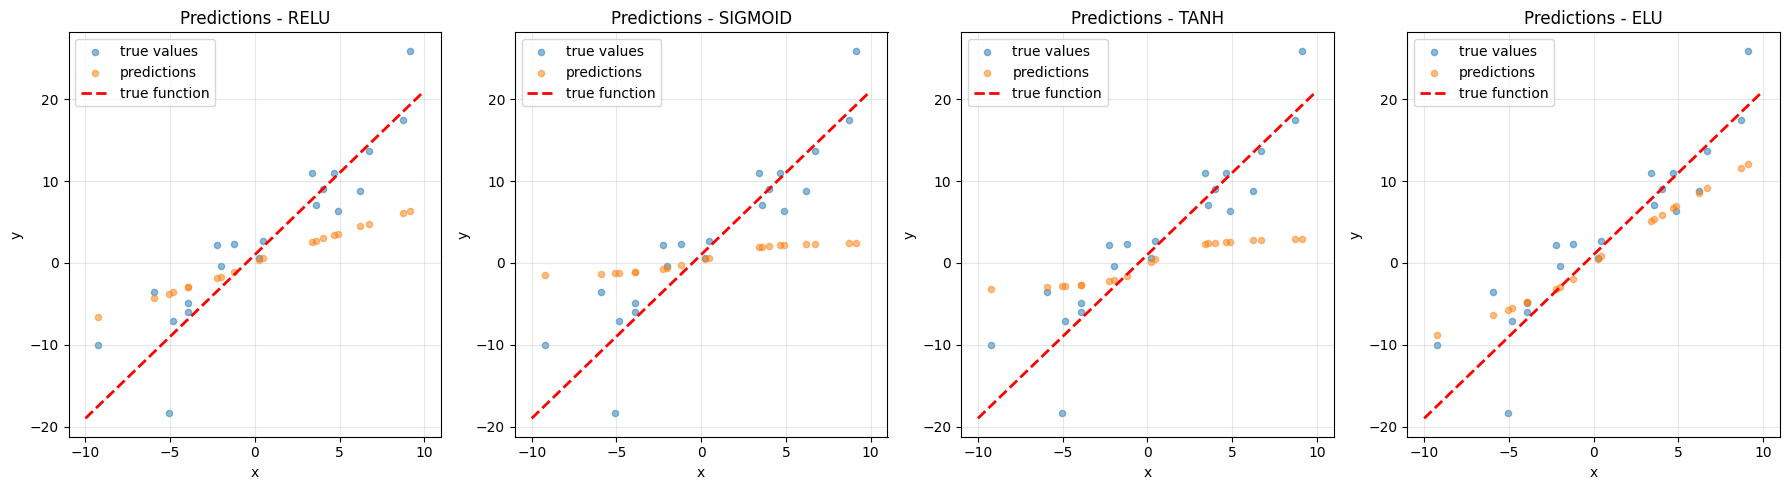

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for i, activation in enumerate(activations):
    model = models[activation]
    y_pred = model.predict(X_test, verbose=0)
    
    axes[i].scatter(X_test, y_test, alpha=0.5, label='true values', s=20)
    axes[i].scatter(X_test, y_pred, alpha=0.5, label='predictions', s=20)
    x_line = np.linspace(-10, 10, 100)
    y_line = 2 * x_line + 1
    axes[i].plot(x_line, y_line, 'r--', linewidth=2, label='true function')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Predictions - {activation.upper()}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Wnioski: na liniowych danych uczenie modelu ciągnie do kształtu funkcji aktywacji

## zad 4

funkcje straty mierzą różnicę między predykcjami modelu a rzeczywistymi wartościami. Optymalizatory aktualizują wagi sieci podczas treningu.

<center>
    <img src="./screens/l7-funkcja-straty.png" style="width: 60%;"><br>
</center>

W tym zadaniu porównam:
- **Funkcje straty**: MSE (dla regresji), Binary Cross-Entropy (dla klasyfikacji)
- **Optymalizatory**: SGD, Adam

<center>
    <img src="./screens/l7-adam-sgd.png" style="width: 60%;"><br>
</center>

Generuje dane

In [51]:
X_clf, y_clf = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=random_state
)
X_clf = X_clf.astype(np.float32)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=random_state
)

I testujemy dla liniowych danych

In [52]:
optimizer_fns = {
    "adam": lambda: keras.optimizers.Adam(),
    "sgd": lambda: keras.optimizers.SGD(),
    "rmsprop": lambda: keras.optimizers.RMSprop()
}

regression_models = {}
regression_histories = {}

for opt_name, opt_fn in optimizer_fns.items():
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=(1,)),
        layers.Dense(1)
    ])
    
    model.compile(
        optimizer=opt_fn(),
        loss='mse',
        metrics=['mae', 'r2_score']
    )
    
    print(f"Training regression model with {opt_name} optimizer...")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    regression_models[opt_name] = model
    regression_histories[opt_name] = history

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training regression model with adam optimizer...
Training regression model with sgd optimizer...
Training regression model with rmsprop optimizer...


i binary

In [53]:
classification_models = {}
classification_histories = {}

for opt_name, opt_fn in optimizer_fns.items():
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=(2,)),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=opt_fn(),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    print(f"Training classification model with {opt_name} optimizer...")
    history = model.fit(
        X_clf_train, y_clf_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    classification_models[opt_name] = model
    classification_histories[opt_name] = history

Training classification model with adam optimizer...
Training classification model with sgd optimizer...
Training classification model with rmsprop optimizer...


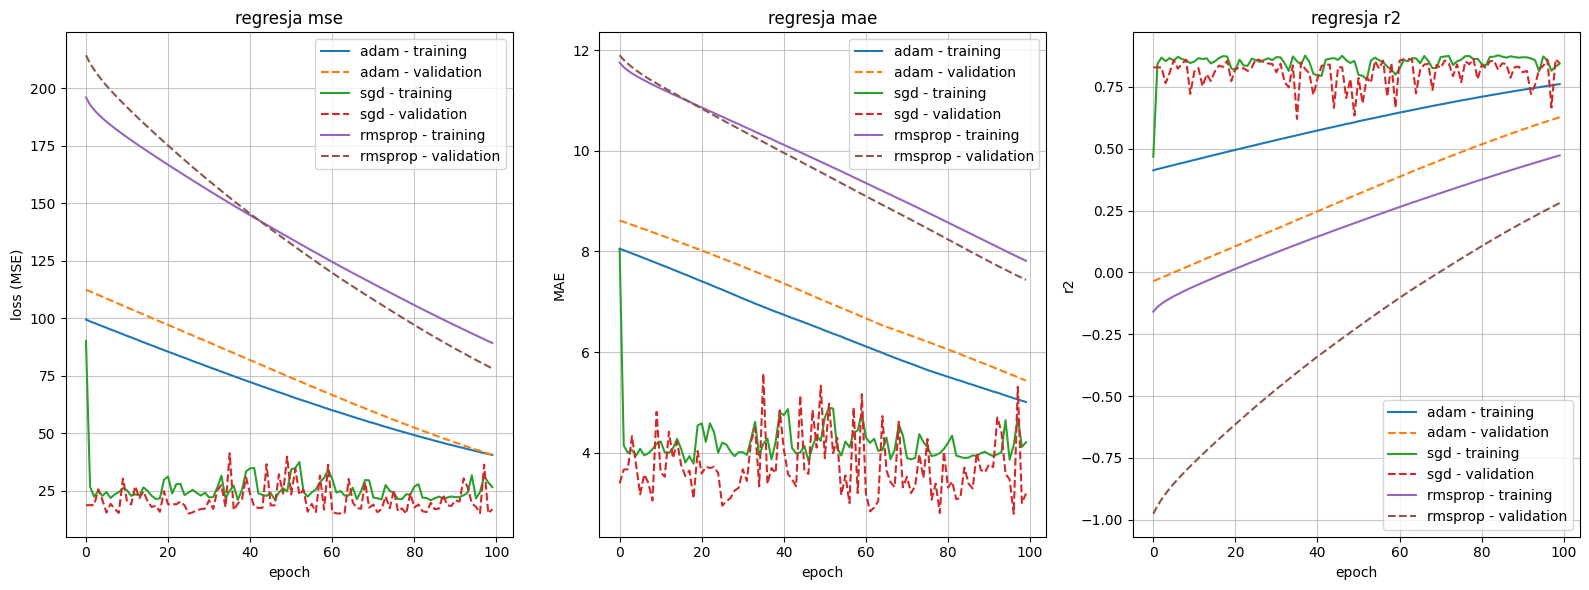

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for opt_name in optimizer_fns.keys():
    history = regression_histories[opt_name]
    axes[0].plot(history.history['loss'], label=f'{opt_name} - training', linestyle='-')
    axes[0].plot(history.history['val_loss'], label=f'{opt_name} - validation', linestyle='--')
    axes[1].plot(history.history['mae'], label=f'{opt_name} - training', linestyle='-')
    axes[1].plot(history.history['val_mae'], label=f'{opt_name} - validation', linestyle='--')
    axes[2].plot(history.history['r2_score'], label=f'{opt_name} - training', linestyle='-')
    axes[2].plot(history.history['val_r2_score'], label=f'{opt_name} - validation', linestyle='--')

axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss (MSE)')
axes[0].set_title('regresja mse')
axes[0].legend()
axes[0].grid(True, alpha=0.7)

axes[1].set_xlabel('epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('regresja mae')
axes[1].legend()
axes[1].grid(True, alpha=0.7)

axes[2].set_xlabel('epoch')
axes[2].set_ylabel('r2')
axes[2].set_title('regresja r2')
axes[2].legend()
axes[2].grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

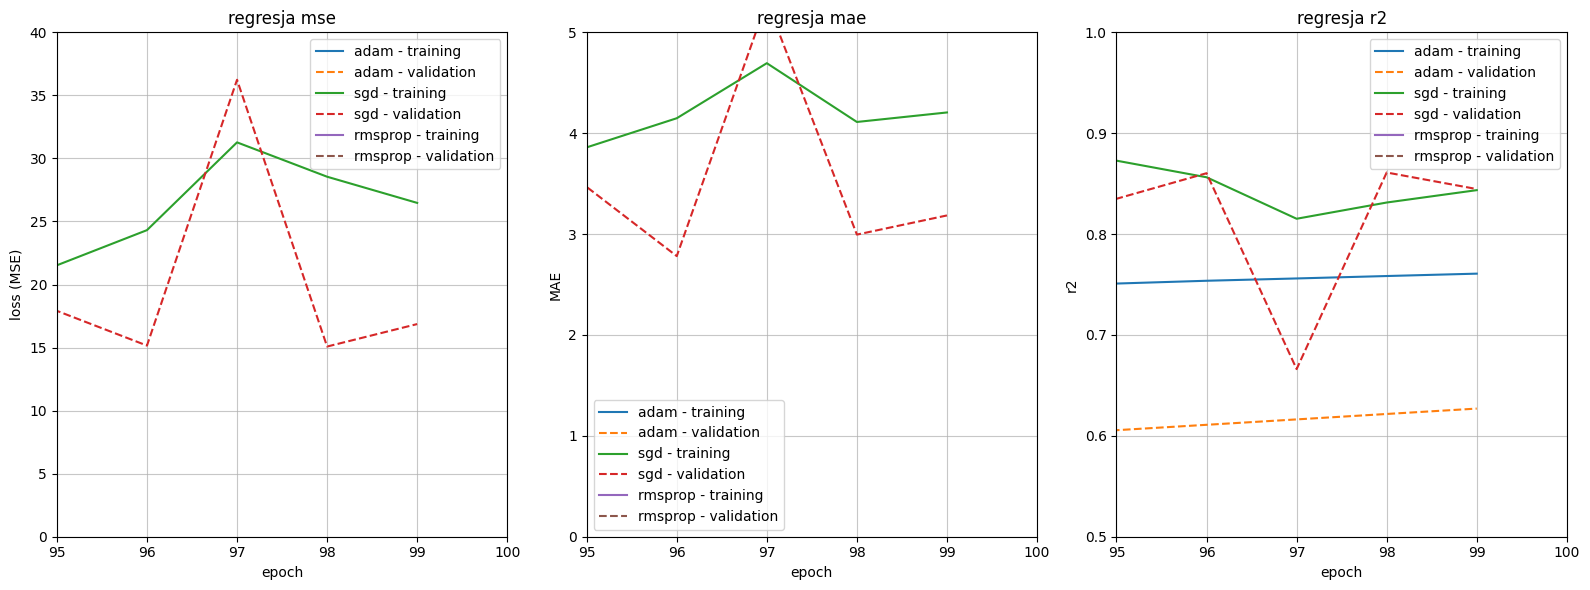

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for opt_name in optimizer_fns.keys():
    history = regression_histories[opt_name]
    axes[0].plot(history.history['loss'], label=f'{opt_name} - training', linestyle='-')
    axes[0].plot(history.history['val_loss'], label=f'{opt_name} - validation', linestyle='--')
    axes[1].plot(history.history['mae'], label=f'{opt_name} - training', linestyle='-')
    axes[1].plot(history.history['val_mae'], label=f'{opt_name} - validation', linestyle='--')
    axes[2].plot(history.history['r2_score'], label=f'{opt_name} - training', linestyle='-')
    axes[2].plot(history.history['val_r2_score'], label=f'{opt_name} - validation', linestyle='--')

axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss (MSE)')
axes[0].set_title('regresja mse')
axes[0].legend()
axes[0].grid(True, alpha=0.7)
axes[0].set_xlim(95, 100)
axes[0].set_ylim(0, 40)

axes[1].set_xlabel('epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('regresja mae')
axes[1].legend()
axes[1].grid(True, alpha=0.7)
axes[1].set_xlim(95, 100)
axes[1].set_ylim(0, 5)

axes[2].set_xlabel('epoch')
axes[2].set_ylabel('r2')
axes[2].set_title('regresja r2')
axes[2].legend()
axes[2].grid(True, alpha=0.7)
axes[2].set_xlim(95, 100)
axes[2].set_ylim(0.5, 1)

plt.tight_layout()
plt.show()

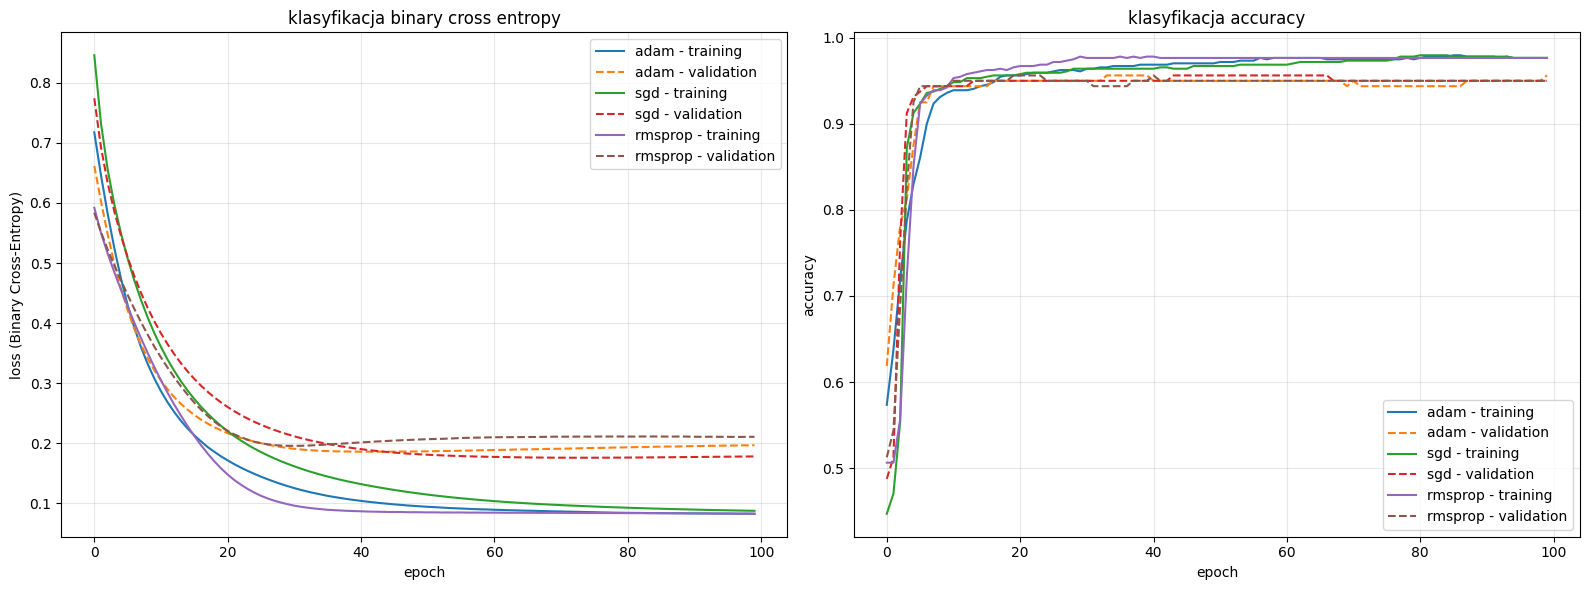

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for opt_name in optimizer_fns.keys():
    history = classification_histories[opt_name]
    axes[0].plot(history.history['loss'], label=f'{opt_name} - training', linestyle='-')
    axes[0].plot(history.history['val_loss'], label=f'{opt_name} - validation', linestyle='--')
    axes[1].plot(history.history['accuracy'], label=f'{opt_name} - training', linestyle='-')
    axes[1].plot(history.history['val_accuracy'], label=f'{opt_name} - validation', linestyle='--')

axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss (Binary Cross-Entropy)')
axes[0].set_title('klasyfikacja binary cross entropy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_title('klasyfikacja accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Podsumowanie dla regresji

In [66]:
test_losses, test_maes, test_r2s = [], [], []
for opt_name in optimizer_fns.keys():
    test_loss, test_mae, test_r2 = regression_models[opt_name].evaluate(X_test, y_test, verbose=0)
    test_losses.append(test_loss)
    test_maes.append(test_mae)
    test_r2s.append(test_r2)

df_results = pd.DataFrame({
    'optimizer': list(optimizer_fns.keys()),
    'test_loss': test_losses,
    'test_mae': test_maes,
    'test_r2': test_r2s
})

df_results

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


,optimizer,test_loss,test_mae,test_r2
0,adam,31.623459,4.253335,0.684112
1,sgd,17.745342,3.167807,0.822741
2,rmsprop,56.033783,5.684274,0.440276


Podsumowanie binarne

In [64]:
test_losses, test_accs = [], []
for opt_name in optimizer_fns.keys():
    test_loss, test_acc = classification_models[opt_name].evaluate(X_clf_test, y_clf_test, verbose=0)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

df_results = pd.DataFrame({
    'optimizer': list(optimizer_fns.keys()),
    'test_loss': test_losses,
    'test_acc': test_accs
})

df_results

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


,optimizer,test_loss,test_acc
0,adam,0.088212,0.970
1,sgd,0.096325,0.965
2,rmsprop,0.092790,0.970


## zad 5

Klasyfikacja binarna to problem przewidywania, do której z dwóch klas należy próbka.

W tym zadaniu:
1. Wczytam zbiór danych Breast Cancer (rak piersi)
2. Zbuduję prostą sieć neuronową do klasyfikacji binarnej
3. Użyję funkcji aktywacji sigmoid w warstwie wyjściowej (wartości w zakresie 0-1, interpretowane jako prawdopodobieństwo)
4. Oceń model na zbiorze testowym

In [67]:
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Classes: {data.target_names}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Classes: ['malignant' 'benign']
Class distribution: [212 357]


Przygotuwje dane

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Buduje model

In [69]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), name='hidden_layer_1'),
    layers.Dense(16, activation='elu', name='hidden_layer_2'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

Trenuje

In [70]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=80,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/80
 9/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6464 - loss: 0.6319

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6923 - loss: 0.5552 - val_accuracy: 0.7363 - val_loss: 0.4812
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8764 - loss: 0.3687 - val_accuracy: 0.9011 - val_loss: 0.3465
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9176 - loss: 0.2659 - val_accuracy: 0.9341 - val_loss: 0.2621
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9451 - loss: 0.2040 - val_accuracy: 0.9451 - val_loss: 0.2111
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9505 - loss: 0.1629 - val_accuracy: 0.9670 - val_loss: 0.1745
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9588 - loss: 0.1354 - val_accuracy: 0.9670 - val_loss: 0.1510
Epoch 7/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9588 - loss: 0.1154 - val_accuracy: 0.9670 - val_loss: 0.1367
Epoch 8/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9615 - loss: 0.1003 - val_accuracy: 0.9670 - val_loss: 0.

Weryfikacja

In [71]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_proba = model.predict(X_test_scaled, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

Test Loss: 0.1193
Test Accuracy: 0.9561


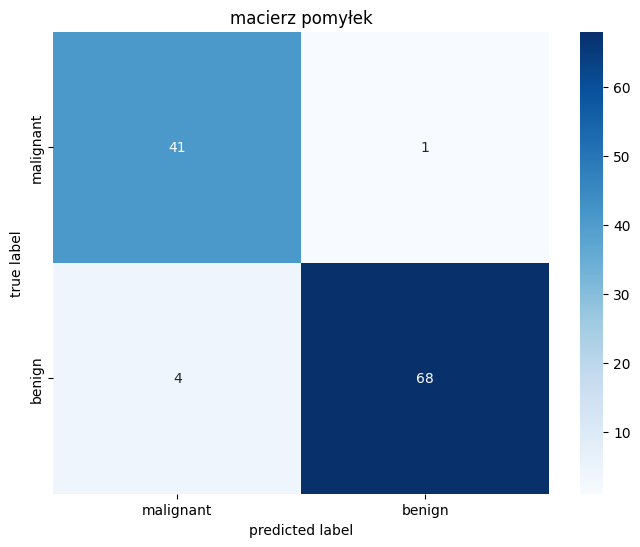

In [72]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('macierz pomyłek')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

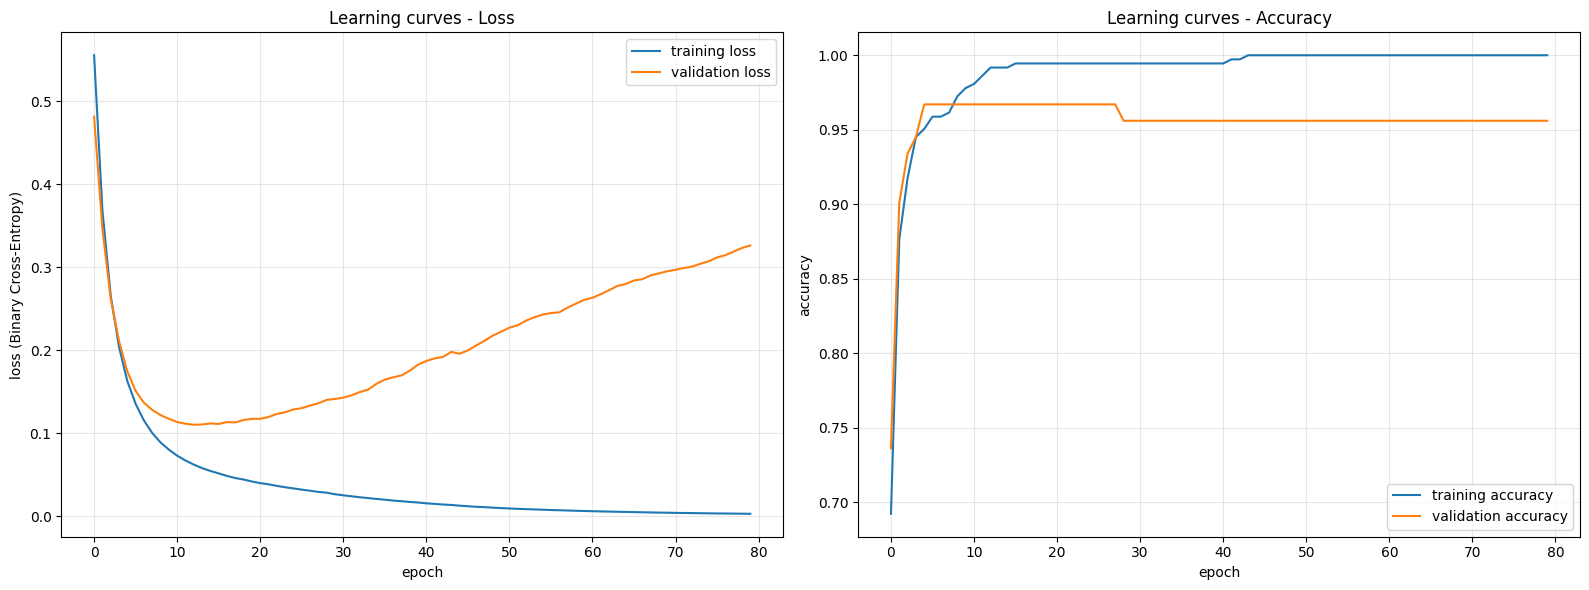

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(history.history['loss'], label='training loss')
axes[0].plot(history.history['val_loss'], label='validation loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss (Binary Cross-Entropy)')
axes[0].set_title('Learning curves - Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='training accuracy')
axes[1].plot(history.history['val_accuracy'], label='validation accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_title('Learning curves - Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## zad 6

Overfitting (przeuczenie) występuje, gdy model uczy się na pamięć danych treningowych, ale nie radzi sobie dobrze z nowymi danymi. Model ma zbyt dużą pojemność w stosunku do ilości danych.

<center>
    <img src="./screens/l7-overfitting.png" style="width: 60%;">
</center>

W tym zadaniu:
1. Wytrenuję "duży" model na małym zbiorze danych, aby spowodować przeuczenie
2. Zastosuję techniki regularizacji (dropout i L2)
3. Porównam krzywe treningowe (błąd na zbiorze treningowym i walidacyjnym)

In [74]:
np.random.seed(random_state)
X_small, y_small = make_classification(
    n_samples=200, # mały zbiór danych
    n_features=20,
    n_informative=10,
    n_redundant=10,
    n_clusters_per_class=1,
    random_state=random_state
)

X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(
    X_small, y_small, test_size=0.3, random_state=random_state, stratify=y_small
)

scaler_small = StandardScaler()
X_small_train_scaled = scaler_small.fit_transform(X_small_train)
X_small_test_scaled = scaler_small.transform(X_small_test)

Bez regularyzacji, duży model

In [75]:
model_no_reg = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_small_train_scaled.shape[1],)),
    layers.Dense(64, activation='elu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_no_reg.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_no_reg.summary()

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

Z regularyzacją

In [76]:
model_dropout = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_small_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_dropout.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

Teraz z L2

In [77]:
model_l2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_small_train_scaled.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(64, activation='elu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])

model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_l2.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

L1 i L2

In [78]:
model_both = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_small_train_scaled.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='elu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_both.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_both.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

Trening!

In [79]:
models_to_train = {
    'No Regularization': model_no_reg,
    'Dropout': model_dropout,
    'L2': model_l2,
    'Dropout + L2': model_both
}

histories = {}

for name, model in models_to_train.items():
    print(f"{name}...")
    history = model.fit(
        X_small_train_scaled, y_small_train,
        epochs=200,
        batch_size=16,
        validation_data=(X_small_test_scaled, y_small_test),
        verbose=0
    )
    histories[name] = history

/home/piotr/.pyenv/versions/3.12.9/envs/tensorflow/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


No Regularization...
Dropout...
L2...
Dropout + L2...


Porównanie

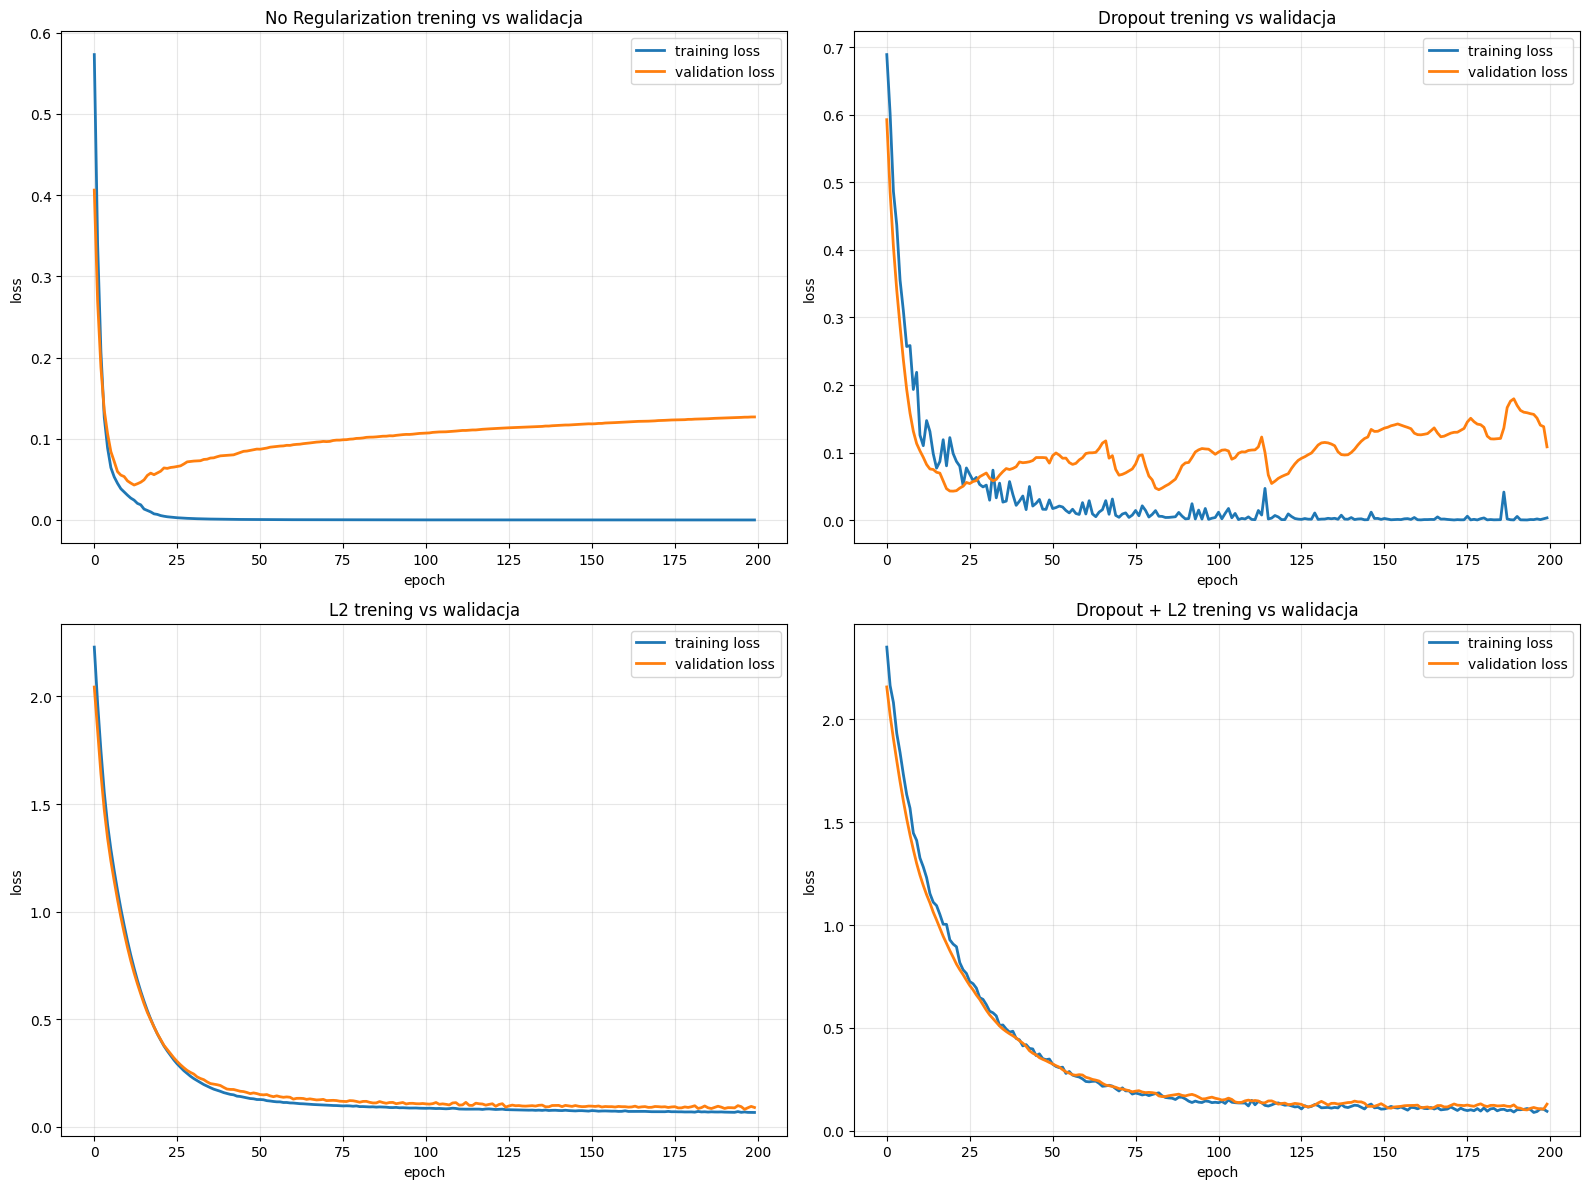

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, (name, history) in enumerate(histories.items()):
    row = i // 2
    col = i % 2
    
    axes[row, col].plot(history.history['loss'], label='training loss', linewidth=2)
    axes[row, col].plot(history.history['val_loss'], label='validation loss', linewidth=2)
    axes[row, col].set_xlabel('epoch')
    axes[row, col].set_ylabel('loss')
    axes[row, col].set_title(f'{name} trening vs walidacja')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} - training', linestyle='-', linewidth=2)
    plt.plot(history.history['val_loss'], label=f'{name} - validation', linestyle='--', linewidth=2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('porównanie wszystkich modeli - loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} - training', linestyle='-', linewidth=2)
    plt.plot(history.history['val_accuracy'], label=f'{name} - validation', linestyle='--', linewidth=2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('porównanie wszystkich modeli - accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
results = []
for name, model in models_to_train.items():
    train_loss, train_acc = model.evaluate(X_small_train_scaled, y_small_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_small_test_scaled, y_small_test, verbose=0)
    
    loss_gap = train_loss - test_loss
    acc_gap = test_acc - train_acc
    
    results.append({
        'Model': name,
        'Train Loss': f'{train_loss:.4f}',
        'Test Loss': f'{test_loss:.4f}',
        'Loss Gap': f'{loss_gap:.4f}',
        'Train Acc': f'{train_acc:.4f}',
        'Test Acc': f'{test_acc:.4f}',
        'Acc Gap': f'{acc_gap:.4f}'
    })

results_df = pd.DataFrame(results)
results_df

,Model,Train Loss,Test Loss,Loss Gap,Train Acc,Test Acc,Acc Gap
0,No Regularization,0.0000,0.1268,-0.1268,1.0000,0.9833,-0.0167
1,Dropout,0.0001,0.1085,-0.1084,1.0000,0.9833,-0.0167
2,L2,0.0665,0.0904,-0.0240,1.0000,1.0000,0.0000
3,Dropout + L2,0.0907,0.1295,-0.0388,0.9929,0.9833,-0.0095


wniosek: na regularyzacji dla danych treningowych mamy błędy, ale zbiór danych jest zbytt prosty, aby różnica była odczuwalna na zbiorze testowym. Ogólnie regularyzacja ma sens ale dla bardziej złożonych danych